## Skoltech
## Intro to data science, fall 2022
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification tasks and use classification performance metrics


# Submiting the answers

Google form to submit your answers: https://forms.gle/4q7o3aBVduyPgWzv9

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then you must round it up to **3 decimals after the floating point**, e.g. 3.142 for pi or 9.78 for 9.780023

---

If your answer is a ``list of float or integer numbers``, then they should be reported in descending order, divided by a comma, e.g.:

10.453,9.112,5.001,5.000,1.02

If your answer is a ``list of str or letters``, then they should be in alphabetical order , e.g.:

charlie,foxtrot,kilo,uniform

a,c,f

---

The last part (Q5) does not have corresponding fields in the google form. It is **not optional** and it will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, you can ask them on piazza: https://piazza.com/class/l8q9rqodz872zj

## Dataset

This dataset concerns credit card applications. It has a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. General goal is to predict which people in the dataset are successful in applying for a credit card.

#### Attributes

-   Gender: 0=Female, 1=Male
-   Age: Age in years
-   Debt: Outstanding debt
-   Married: 0=Single/Divorced/etc, 1=Married
-   BankCustomer: 0=does not have a bank account, 1=has a bank account
-   Investment score: a number from 0 to 10
-   BankRecord
-   Industry: job sector of current or most recent job
-   Ethnicity
-   YearsEmployed
-   PriorDefault: 0=no prior defaults, 1=prior default
-   Employed: 0=not employed, 1=employed
-   CreditScore
-   DriversLicense: 0=no license, 1=has license
-   Citizenship: either ByBirth, ByOtherMeans or Temporary
-   ZipCode: 5 digit number
-   Income
-   Approved: 0=not approved, 1=approved

#### Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

#### Read the data

In [2]:
df = pd.read_csv('credit_score_dataset.csv')

## 1. Data exploration

Let's take a closer look at the data.

In [3]:
df.head(5)

,Gender,Age,Debt,Married,BankCustomer,Industry,InvestmentScore,BankRecord,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,3.65,1,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,1.94,1,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,8.15,1,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,7.99,1,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,2.37,1,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


### Q1.1

#### How many columns in the dataset?

In [4]:
df.shape[1]

18

### Q1.2

#### How many unique ethnicities are there?

In [5]:
df.Ethnicity.value_counts().size

5

### Q1.3
#### What is the average age? Please answer with an integer. Please, use int().

In [6]:
int(df.Age.mean())

31

### Q1.4
#### People working in which industry are getting the most income on average?

In [7]:
# industries = df.Industry.value_counts().index
df.groupby('Industry').mean().Income.sort_values(ascending=False).index[0]

'Transport'

### Q1.5

#### Assuming that column 'YearsEmployed' counts years from the first employment until the current moment, in what age people start working? Build a histogram for the age of the first employment. What is the average age to start working at? Please, answer with a float.

29.291


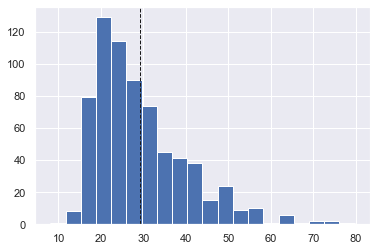

In [8]:
df['AgeOfEmp'] = df.Age - df.YearsEmployed;
plt.hist(df.AgeOfEmp, bins = 20)
df.AgeOfEmp.mean()
plt.axvline(df.AgeOfEmp.mean(), color='k', linestyle='dashed', linewidth=1)
print(round(df.AgeOfEmp.mean(),3))

### Q1.6 

Let's try to analyze different features together. Build a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for columns from ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income'] with 'Approved' as a 'hue' argument. The hue argument adds a color marker to the plots and it will allow us to analyze how loan application approval relates to other features. Note, you can pass `kind='scatter', plot_kws=dict(alpha=0.2)` arguments to make the dots semi-transparent.

Which of the statements are true, if judged from the plot?
- (a) People over 40 years old have less debt than people under 40 years old
- (b) A credit application with low credit score is approved almost always
- (c) There is no clear dependence between debt and years employed
- (d) High income means high credit score

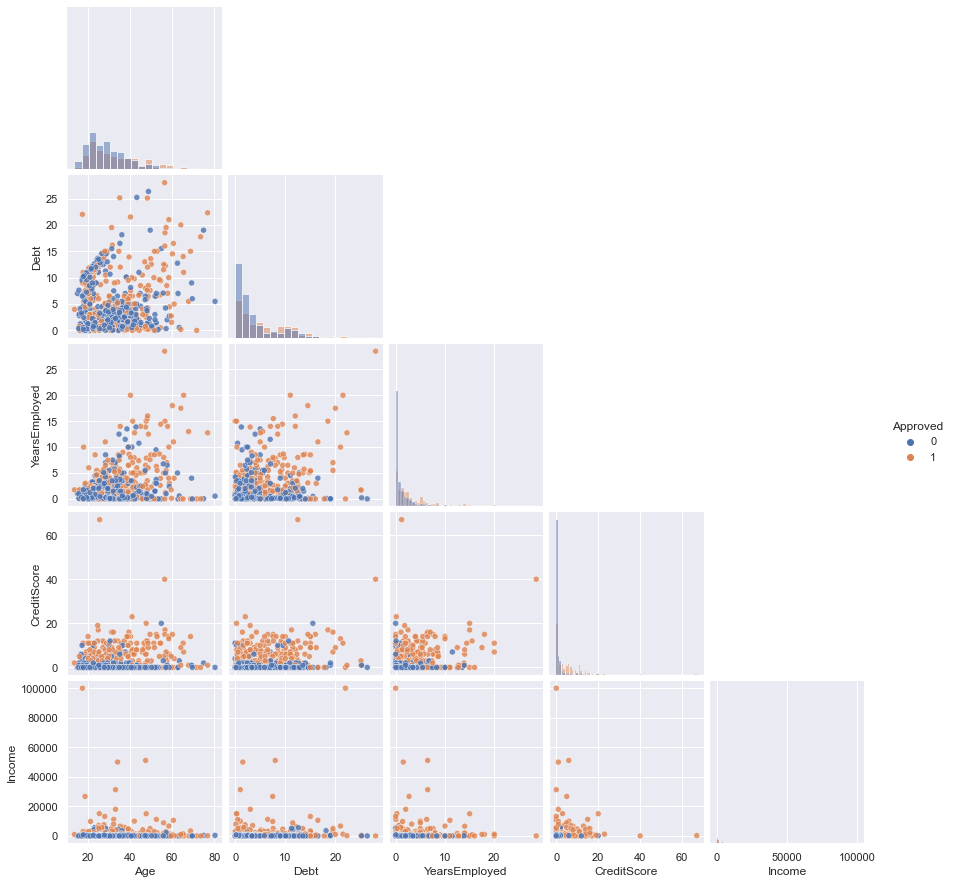

In [9]:
temp=['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income', 'Approved']
sns.pairplot(data=df[temp],  hue="Approved",diag_kind="hist", corner=True,kind='scatter', plot_kws=dict(alpha=0.8));

c

### Q1.7

Build a [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) for ethnicity and industry. How many Latino people are working in healthcare?

In [10]:
pd.crosstab(df.Ethnicity, df.Industry).Healthcare.Latino

52

## 2. Preprocessing
The goal of the segment is to prepare data for further work

### Q2.1
There are two columns, that are exactly the same for all of the people. Let's drop one of them. As an answer, write the names of these columns divided by a comma.

In [11]:
df.describe()
if(df['BankCustomer'].equals(df['BankRecord'])):
    df = df.drop('BankRecord', axis=1)
    
print('BankCustomer, BankRecord')

BankCustomer, BankRecord


### Q2.2

Now it's time to talk about the task for today. Our bank wants to predict whether the application for a loan is worthy or not. So we need to build a model that would predict it.

Let's divide the dataset into a target (the 'Approved' column) and data (the rest of the columns). How many positive labels are there in target?


In [12]:
target = df.Approved;
data = df.drop('Approved', axis=1);
target.value_counts()[1]

307

### Q2.3

To honestly estimate the performance of the model, we need to split the dataset into train and test parts. In reality, a test could be millions of customers and a train could be a small playground to estimate the campaign. Our current dataset is not that big, so let's say the test would be just 30% of the dataset. Use `train_test_split` to make a split. Please set the `random_state` argument to 314 and don't forget to shuffle and stratify.
How many positive labels do you have in test targets?

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=314, shuffle=True, stratify=target)

sum(y_test==1)

92

## 3. Basic models

Let's start with the most basic models. We going to use logistic regression, k neighbors classifier, and random forest without any modification or param tuning. This way we could be sure our future modification would indeed make the model stronger.

Some of the features are not usable in the current form as categorical, so let's make a copy of x with the following columns for the section:

'Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income'

### Q3.1

Build a logistic regression model. Set max_iter parameter to 5000. What is the f1_score for the model?


In [14]:
key_features = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income'];
X_test1=X_test[key_features];
X_train1=X_train[key_features];

In [15]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

Log = LogisticRegression(max_iter=5000)
Log.fit(X_train1, y_train)
y_pred1 = Log.predict(X_test1)

print(round(f1_score(y_pred1, y_test),3))

0.862


### Q3.2

Build a k-neighbors classifier. What is the f1_score for the model?

In [16]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(X_train1, y_train)
y_pred2 = KNN.predict(X_test1)

print(round(f1_score(y_test, y_pred2),3))

0.613


### Q3.3

Build a random forest classifier with n_estimators = 5. What is the f1_score for the model?

In [17]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 5)
clf.fit(X_train1, y_train)
y_pred3 = clf.predict(X_test1)

print(round(f1_score(y_test, y_pred3),3))

0.828


### Q3.4

The models without fine-tuning are not as effective. First, let's try to regularize the regression with the L2 norm. Use 5-split cross-validation grid search to find the optimal C. You can use verbose argument of GridSearchCV in order to watch the progress of cross-validation. What is the f1 score for the model trained on the full train dataset with this regularization?

In [18]:
from sklearn.model_selection import GridSearchCV, KFold

cv = KFold(n_splits=5, random_state=314, shuffle=True)
clf = LogisticRegression(max_iter=5000)

params_grid = {
    'C': np.logspace(-9, 1, 30)
}

gs = GridSearchCV(clf, param_grid=params_grid, cv = cv)
gs.fit(X_train1, y_train)

y_pred_test=gs.best_estimator_.predict(X_test1)
print(round(f1_score(y_test, y_pred_test),3))

0.862


In [19]:
y_pred_test1=gs.best_estimator_.predict(X_test1)
print(round(f1_score(y_test, y_pred_test1),3))

0.862


In [20]:
print(round(gs.best_score_,3))

0.853


### Q3.5

Fine-tune a k-NN classifier, try to find an optimal number of neighbors, weights, and p with a 5-split cross-validation. What is the f1 score for a model trained on a full train dataset with these parameters?

In [21]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV

cv=KFold(n_splits=5, shuffle = True, random_state=314)
clf = KNeighborsClassifier()

params = {
    'n_neighbors': stats.randint(2, 70),
    'weights': ['uniform','distance'],
    'p':[1,2]
    
}

rs = RandomizedSearchCV(estimator=clf,
                       param_distributions=params,
                       n_iter=100,
                       cv=cv)
rs.fit(X_train1, y_train)

y_pred_test2=rs.best_estimator_.predict(X_test1)
print(round(f1_score(y_pred_test2,y_test),3))

0.629


In [22]:
rs.best_estimator_

KNeighborsClassifier(n_neighbors=24, p=1)

### Q3.6

Use the 5-split CV to find the optimal number of estimators and max_features for the random forest. What is the f1 score for random forest trained on a full train dataset with these parameters?

In [23]:
cv = KFold(n_splits=5, random_state=314, shuffle=True)
clf = RandomForestClassifier()

params = {
    'n_estimators': stats.randint(2, 70),
    'max_features': ['sqrt', 'log2', None]
    
}

rs = RandomizedSearchCV(estimator=clf,
                       param_distributions=params,
                       n_iter=100,
                       cv=cv)
rs.fit(X_train1, y_train)

y_pred_test3=rs.best_estimator_.predict(X_test1)
print(round(f1_score(y_test, y_pred_test3),3))

0.854


## 4. Working with features

Machine learning is sometimes called data science because everything depends on data. In this section, we'll apply some of the most popular modifications for data. IMPORTANT: In the previous section we took a subset of the columns; now it's time to work with all of them.

### Q4.1

One of the standard procedures is data standardizations - it strongly influences the results of k-NN and make the convergence of other algorithms (i.e. logreg and neural nets) much faster. Let's apply `StandardScaler` for all the numerical columns - 'Age', 'Debt', 'YearsEmployed', 'InvestmentScore', 'CreditScore', 'ZipCode', 'Income'. 

What is the maximum value of Income now in the test set?

In [24]:
from sklearn.preprocessing import StandardScaler

features=['Age', 'Debt', 'YearsEmployed', 'InvestmentScore', 'CreditScore', 'ZipCode', 'Income'];
Xnew=data[features];

scaler = StandardScaler()
scaler.fit(Xnew)
z=scaler.transform(Xnew)

print(round(pd.DataFrame(z).max().iloc[-1],3))

19.012


### Q4.2
We have three categorical columns - 'Industry', 'Ethnicity' and 'Citizen'. We can't use them directly with our models, so let's use one-hot encoding - create a separate binary column for each possible value and drop the original 'Industry', 'Ethnicity' and 'Citizen' columns.

How many columns do we have now?

In [25]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(sparse=False)

TCC = ['Industry', 'Ethnicity', 'Citizen' ]
redo_colmns = pd.DataFrame(ohe.fit_transform(data[TCC]))

names = [i[3:] for i in ohe.get_feature_names()]
redo_colmns.set_axis(names,inplace = True,axis=1)

#redo_colmns = ohe.get_feature_names_out([TCC])


X = pd.concat([data,redo_colmns],axis = 1)
X = X.drop(TCC, axis = 1)
len(X.columns.values)

36

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=314, shuffle=True, stratify=target)

In [27]:
#X.dtypes
X.columns;

redo_colmns
# names

,CommunicationServices,ConsumerDiscretionary,ConsumerStaples,Education,Energy,Financials,Healthcare,Industrials,InformationTechnology,Materials,...,Transport,Utilities,Asian,Black,Latino,Other,White,ByBirth,ByOtherMeans,Temporary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
686,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
687,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
688,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


### Q4.3

To check the effects of the modification, train the logistic regression with **updated** optimal C. What is the f1 score now?

In [28]:
from sklearn.pipeline import make_pipeline

cv = KFold(n_splits=5)
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=5000))

params_grid = {
    'logisticregression__C': np.logspace(-9, 1, 30)
}

gs = GridSearchCV(pipe, param_grid=params_grid, cv = cv)
gs.fit(X_train, y_train)

y_pred_test_logistic=gs.best_estimator_.predict(X_test)
print(round(f1_score(y_test, y_pred_test_logistic),3))

0.878


### Q4.4

Another popular performance metric is the ROC curve. Train a k-NN and logistic regression with **updated** optimal params and build a roc-curve for both of them on the sample plot. What is the difference between them on FPR 0.7 (approximately)?

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob_logistic = gs.predict_proba(X_test)

In [30]:
ypl=y_prob_logistic[:,1];
# for i in range (len(np.round_(y_prob_logistic,decimals = 2))):
#     ypl.append(np.round_(y_prob_logistic,decimals = 2)[i][1])
ypl;

In [31]:
cv=KFold(n_splits=5, shuffle = True, random_state=314)
clf = KNeighborsClassifier()

params = {
    'n_neighbors': stats.randint(2, 90),
    'weights': ['uniform','distance'],
    'p':[1,2]
    
}

rs = RandomizedSearchCV(estimator=clf,
                       param_distributions=params,
                       n_iter=100,
                       cv=cv)
rs.fit(X_train, y_train)

y_pred_test2=rs.best_estimator_.predict(X_test)
print(round(f1_score(y_pred_test2,y_test),3))


0.629


In [32]:
y_prob_KNN = rs.predict_proba(X_test)
ypk=y_prob_KNN[:,1];

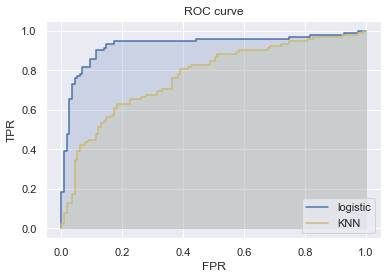

In [33]:
fpr, tpr, _ = roc_curve(y_test, ypl)
plt.step(fpr, tpr, color='b',
         where='post', label='logistic')
plt.fill_between(fpr, tpr, alpha=0.2, color='b')

fpr, tpr, _ = roc_curve(y_test, ypk)
plt.step(fpr, tpr, color='y',
         where='post', label='KNN')
plt.fill_between(fpr, tpr, alpha=0.2, color='y')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend();

# plt.xlim([0.65, 0.75])
# plt.ylim([0.9, .975])

0.957 - 0.913 =  0.044

### Q5.1 (2 points)

Propose two derivative features and retrain one of the models with them. What is the performance?

In [34]:
X

,Gender,Age,Debt,Married,BankCustomer,InvestmentScore,YearsEmployed,PriorDefault,Employed,CreditScore,...,Transport,Utilities,Asian,Black,Latino,Other,White,ByBirth,ByOtherMeans,Temporary
0,1,30.83,0.000,1,1,3.65,1.25,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0,58.67,4.460,1,1,1.94,3.04,1,1,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,24.50,0.500,1,1,8.15,1.50,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,27.83,1.540,1,1,7.99,3.75,1,1,5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1,20.17,5.625,1,1,2.37,1.71,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,7.30,1.25,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
686,0,22.67,0.750,1,1,1.79,2.00,0,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
687,0,25.25,13.500,0,0,7.64,2.00,0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
688,1,17.92,0.205,1,1,4.92,0.04,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [35]:
#reaarranging dataset
X=df;
Y=df.Approved;

X['Secured']=(X.Married+X.DriversLicense+X.Employed)/3;
X.Debt = (X.Debt > 0)+1-1;

temp = X.Income;
X['SalaryRange'] = 1 + sum([data['Income'] > temp.quantile(0.2), data['Income'] > temp.quantile(0.4),data['Income'] > temp.quantile(0.6),data['Income'] > temp.quantile(0.8)])

X['AgeRange'] = sum([data['Age'] > 15, data['Age'] > 30,data['Age'] > 45,data['Age'] > 60])

to_drop = ['Approved', 'Gender','Married','BankCustomer', 'Ethnicity', 'PriorDefault', 'Employed','DriversLicense','Citizen','ZipCode','Income']
X = X.drop(to_drop, axis = 1)




#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=314, shuffle=True, stratify=target)


#KFold
cv = KFold(n_splits=5)
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

#grid_search
params_grid = {
    'kneighborsclassifier__n_neighbors': range(3,22,2)
}

gs = GridSearchCV(pipe, param_grid=params_grid, cv = cv)
gs.fit(X_train, y_train)

#random_search
params = {
    'kneighborsclassifier__n_neighbors': stats.randint(2, 90),
    'kneighborsclassifier__weights': ['uniform','distance'],
    'kneighborsclassifier__p':[1,2]   
}

rs = RandomizedSearchCV(estimator=pipe,param_distributions=params, n_iter=100,cv=cv)
rs.fit(X_train, y_train)

y_pred_test_rand=rs.best_estimator_.predict(X_test) #result_by_random
y_pred_test_grid=gs.best_estimator_.predict(X_test) #result_by_grid

print(round(f1_score(y_test, y_pred_test_rand),3), ' - random search\n', round(f1_score(y_test, y_pred_test_grid),3),' - grid search\n')

0.74  - random search
 0.682  - grid search



# Random is way much better!!!

In [36]:
# X.columns
X.shape

(690, 23)

### Q5.2

Train an xboost model with f1 score 0.8+

In [37]:
# X.dtypes

In [38]:
from tqdm import tqdm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

def mse(a,b):
    return np.round(mean_squared_error(a,b), 3)

train_mse = []
test_mse = []

n_trees = range(1, 100)

for i in tqdm(n_trees):
    gbt = GradientBoostingRegressor(n_estimators=i, learning_rate=.75, max_depth=1)
    gbt.fit(X_train, y_train)
    
    y_pred_train = gbt.predict(X_train)
    y_pred_test = gbt.predict(X_test)
    
    train_mse.append(mse(y_train, y_pred_train))
    test_mse.append(mse(y_test, y_pred_test))
    

100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [00:02<00:00, 33.35it/s]


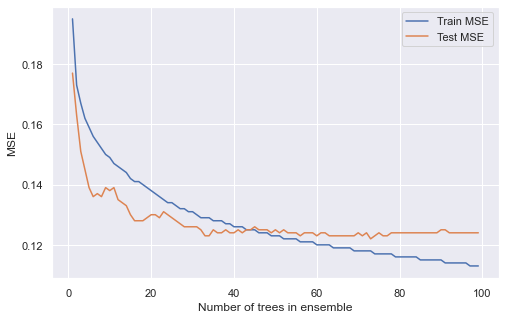

In [39]:
    
plt.figure(figsize=(8, 5))
plt.plot(n_trees, train_mse, label='Train MSE')
plt.plot(n_trees, test_mse, label='Test MSE')
plt.xlabel('Number of trees in ensemble')
plt.ylabel('MSE')
plt.legend();

In [40]:
train_mse = []
test_mse = []

depth = range(1, 20)

for d in tqdm(depth):
    gbt = GradientBoostingRegressor(n_estimators=10, learning_rate=.1, max_depth=d)
    gbt.fit(X_train, y_train)
    
    y_pred_train = gbt.predict(X_train)
    y_pred_test = gbt.predict(X_test)
    
    train_mse.append(mse(y_train, y_pred_train))
    test_mse.append(mse(y_test, y_pred_test))

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 36.32it/s]


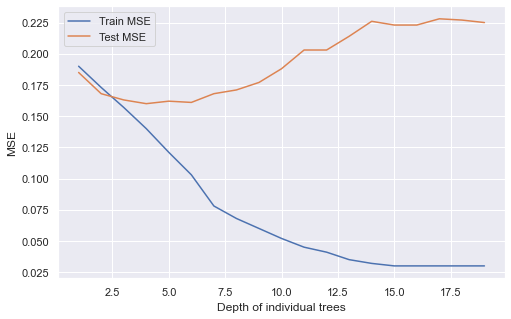

In [41]:
plt.figure(figsize=(8, 5))
plt.plot(depth, train_mse, label='Train MSE')
plt.plot(depth, test_mse, label='Test MSE')
plt.xlabel('Depth of individual trees')
plt.ylabel('MSE')
plt.legend();

In [42]:
# X
for i, col in enumerate(X.columns):
    print(i,col, X[col].dtype)



0 Age float64
1 Debt int32
2 InvestmentScore float64
3 YearsEmployed float64
4 CreditScore int64
5 AgeOfEmp float64
6 Secured float64
7 SalaryRange int32
8 AgeRange int32
9 0 float64
10 1 float64
11 2 float64
12 3 float64
13 4 float64
14 5 float64
15 6 float64
16 7 float64
17 8 float64
18 9 float64
19 10 float64
20 11 float64
21 12 float64
22 13 float64


In [43]:
from catboost import CatBoostClassifier, Pool


X_train.fillna('NA',inplace=True)
X_test.fillna('NA',inplace=True)

cat_feat = [1,*list(range(10,23))]
cat_feat = list(map(int, cat_feat))

for i in range(13):
    X_train[i+1]=X_train[i+1].astype(int)
    X_test[i+1]=X_test[i+1].astype(int)

data_train = Pool(X_train,
                 label=y_train,
                 cat_features=cat_feat)

data_test = Pool(X_test,
                 label=y_test,
                 cat_features=cat_feat)

ctbpararm = { 
    'depth':4,
    'learning_rate':.33,
    'l2_leaf_reg':3,
#     'loss_function':'MultiClass',
    'verbose':1,
    'thread_count':12,
            }
model = CatBoostClassifier(**ctbpararm)
model.fit(X = data_train, silent=False, eval_set = data_test)

0:	learn: 0.6076394	test: 0.5930551	best: 0.5930551 (0)	total: 55.3ms	remaining: 55.3s
1:	learn: 0.5337446	test: 0.5224873	best: 0.5224873 (1)	total: 58.9ms	remaining: 29.4s
2:	learn: 0.5054422	test: 0.4859790	best: 0.4859790 (2)	total: 62.6ms	remaining: 20.8s
3:	learn: 0.4815706	test: 0.4614589	best: 0.4614589 (3)	total: 66.4ms	remaining: 16.5s
4:	learn: 0.4687741	test: 0.4604749	best: 0.4604749 (4)	total: 70.1ms	remaining: 13.9s
5:	learn: 0.4476880	test: 0.4431370	best: 0.4431370 (5)	total: 72.8ms	remaining: 12.1s
6:	learn: 0.4336245	test: 0.4377211	best: 0.4377211 (6)	total: 76.7ms	remaining: 10.9s
7:	learn: 0.4227646	test: 0.4240551	best: 0.4240551 (7)	total: 79.3ms	remaining: 9.84s
8:	learn: 0.4128914	test: 0.4185929	best: 0.4185929 (8)	total: 81.8ms	remaining: 9s
9:	learn: 0.4078483	test: 0.4122670	best: 0.4122670 (9)	total: 85.5ms	remaining: 8.46s
10:	learn: 0.4011550	test: 0.4117179	best: 0.4117179 (10)	total: 88ms	remaining: 7.91s
11:	learn: 0.3962660	test: 0.4073031	best: 0.4

101:	learn: 0.0797754	test: 0.4613160	best: 0.3899986 (23)	total: 266ms	remaining: 2.35s
102:	learn: 0.0797091	test: 0.4610596	best: 0.3899986 (23)	total: 268ms	remaining: 2.34s
103:	learn: 0.0781505	test: 0.4607745	best: 0.3899986 (23)	total: 270ms	remaining: 2.33s
104:	learn: 0.0772274	test: 0.4632537	best: 0.3899986 (23)	total: 272ms	remaining: 2.32s
105:	learn: 0.0755662	test: 0.4662967	best: 0.3899986 (23)	total: 274ms	remaining: 2.31s
106:	learn: 0.0749242	test: 0.4685085	best: 0.3899986 (23)	total: 276ms	remaining: 2.3s
107:	learn: 0.0743161	test: 0.4666548	best: 0.3899986 (23)	total: 277ms	remaining: 2.29s
108:	learn: 0.0722033	test: 0.4674395	best: 0.3899986 (23)	total: 279ms	remaining: 2.28s
109:	learn: 0.0716072	test: 0.4674968	best: 0.3899986 (23)	total: 281ms	remaining: 2.27s
110:	learn: 0.0706515	test: 0.4688237	best: 0.3899986 (23)	total: 283ms	remaining: 2.27s
111:	learn: 0.0700843	test: 0.4714463	best: 0.3899986 (23)	total: 285ms	remaining: 2.26s
112:	learn: 0.0695221	

195:	learn: 0.0289524	test: 0.5224493	best: 0.3899986 (23)	total: 439ms	remaining: 1.8s
196:	learn: 0.0284351	test: 0.5212728	best: 0.3899986 (23)	total: 441ms	remaining: 1.79s
197:	learn: 0.0279199	test: 0.5248195	best: 0.3899986 (23)	total: 442ms	remaining: 1.79s
198:	learn: 0.0277914	test: 0.5242185	best: 0.3899986 (23)	total: 444ms	remaining: 1.79s
199:	learn: 0.0277705	test: 0.5241032	best: 0.3899986 (23)	total: 445ms	remaining: 1.78s
200:	learn: 0.0275850	test: 0.5235289	best: 0.3899986 (23)	total: 447ms	remaining: 1.78s
201:	learn: 0.0272936	test: 0.5243316	best: 0.3899986 (23)	total: 448ms	remaining: 1.77s
202:	learn: 0.0270136	test: 0.5251601	best: 0.3899986 (23)	total: 450ms	remaining: 1.77s
203:	learn: 0.0268218	test: 0.5228867	best: 0.3899986 (23)	total: 452ms	remaining: 1.76s
204:	learn: 0.0267715	test: 0.5228614	best: 0.3899986 (23)	total: 454ms	remaining: 1.76s
205:	learn: 0.0267233	test: 0.5230410	best: 0.3899986 (23)	total: 456ms	remaining: 1.75s
206:	learn: 0.0265841	

296:	learn: 0.0155458	test: 0.5561310	best: 0.3899986 (23)	total: 609ms	remaining: 1.44s
297:	learn: 0.0154593	test: 0.5569100	best: 0.3899986 (23)	total: 611ms	remaining: 1.44s
298:	learn: 0.0152750	test: 0.5569241	best: 0.3899986 (23)	total: 613ms	remaining: 1.44s
299:	learn: 0.0150555	test: 0.5611300	best: 0.3899986 (23)	total: 615ms	remaining: 1.43s
300:	learn: 0.0149536	test: 0.5619540	best: 0.3899986 (23)	total: 616ms	remaining: 1.43s
301:	learn: 0.0148744	test: 0.5620816	best: 0.3899986 (23)	total: 618ms	remaining: 1.43s
302:	learn: 0.0147211	test: 0.5628501	best: 0.3899986 (23)	total: 620ms	remaining: 1.43s
303:	learn: 0.0146162	test: 0.5629298	best: 0.3899986 (23)	total: 622ms	remaining: 1.42s
304:	learn: 0.0146040	test: 0.5631181	best: 0.3899986 (23)	total: 623ms	remaining: 1.42s
305:	learn: 0.0145164	test: 0.5630477	best: 0.3899986 (23)	total: 625ms	remaining: 1.42s
306:	learn: 0.0144903	test: 0.5625304	best: 0.3899986 (23)	total: 626ms	remaining: 1.41s
307:	learn: 0.0143415

401:	learn: 0.0101670	test: 0.5915688	best: 0.3899986 (23)	total: 783ms	remaining: 1.17s
402:	learn: 0.0101670	test: 0.5915693	best: 0.3899986 (23)	total: 785ms	remaining: 1.16s
403:	learn: 0.0101670	test: 0.5915694	best: 0.3899986 (23)	total: 786ms	remaining: 1.16s
404:	learn: 0.0101220	test: 0.5929461	best: 0.3899986 (23)	total: 788ms	remaining: 1.16s
405:	learn: 0.0101220	test: 0.5929461	best: 0.3899986 (23)	total: 790ms	remaining: 1.16s
406:	learn: 0.0101199	test: 0.5929309	best: 0.3899986 (23)	total: 791ms	remaining: 1.15s
407:	learn: 0.0101081	test: 0.5927360	best: 0.3899986 (23)	total: 793ms	remaining: 1.15s
408:	learn: 0.0100410	test: 0.5935870	best: 0.3899986 (23)	total: 795ms	remaining: 1.15s
409:	learn: 0.0100070	test: 0.5935778	best: 0.3899986 (23)	total: 796ms	remaining: 1.15s
410:	learn: 0.0099792	test: 0.5943687	best: 0.3899986 (23)	total: 798ms	remaining: 1.14s
411:	learn: 0.0099520	test: 0.5943121	best: 0.3899986 (23)	total: 800ms	remaining: 1.14s
412:	learn: 0.0099520

506:	learn: 0.0088715	test: 0.6014690	best: 0.3899986 (23)	total: 952ms	remaining: 926ms
507:	learn: 0.0088716	test: 0.6014692	best: 0.3899986 (23)	total: 954ms	remaining: 924ms
508:	learn: 0.0088703	test: 0.6014673	best: 0.3899986 (23)	total: 955ms	remaining: 922ms
509:	learn: 0.0088700	test: 0.6014675	best: 0.3899986 (23)	total: 957ms	remaining: 919ms
510:	learn: 0.0088700	test: 0.6014675	best: 0.3899986 (23)	total: 958ms	remaining: 917ms
511:	learn: 0.0088698	test: 0.6014669	best: 0.3899986 (23)	total: 960ms	remaining: 915ms
512:	learn: 0.0088698	test: 0.6014670	best: 0.3899986 (23)	total: 962ms	remaining: 913ms
513:	learn: 0.0088695	test: 0.6014663	best: 0.3899986 (23)	total: 963ms	remaining: 911ms
514:	learn: 0.0088692	test: 0.6014632	best: 0.3899986 (23)	total: 964ms	remaining: 908ms
515:	learn: 0.0088689	test: 0.6014746	best: 0.3899986 (23)	total: 966ms	remaining: 906ms
516:	learn: 0.0088219	test: 0.6021581	best: 0.3899986 (23)	total: 967ms	remaining: 904ms
517:	learn: 0.0087933

622:	learn: 0.0083224	test: 0.6088513	best: 0.3899986 (23)	total: 1.12s	remaining: 680ms
623:	learn: 0.0082965	test: 0.6091137	best: 0.3899986 (23)	total: 1.13s	remaining: 678ms
624:	learn: 0.0082635	test: 0.6085054	best: 0.3899986 (23)	total: 1.13s	remaining: 676ms
625:	learn: 0.0081895	test: 0.6096059	best: 0.3899986 (23)	total: 1.13s	remaining: 675ms
626:	learn: 0.0081895	test: 0.6096053	best: 0.3899986 (23)	total: 1.13s	remaining: 673ms
627:	learn: 0.0081894	test: 0.6096072	best: 0.3899986 (23)	total: 1.13s	remaining: 671ms
628:	learn: 0.0081894	test: 0.6096073	best: 0.3899986 (23)	total: 1.13s	remaining: 669ms
629:	learn: 0.0081893	test: 0.6096077	best: 0.3899986 (23)	total: 1.14s	remaining: 667ms
630:	learn: 0.0081894	test: 0.6096078	best: 0.3899986 (23)	total: 1.14s	remaining: 665ms
631:	learn: 0.0081893	test: 0.6096088	best: 0.3899986 (23)	total: 1.14s	remaining: 663ms
632:	learn: 0.0081893	test: 0.6096095	best: 0.3899986 (23)	total: 1.14s	remaining: 661ms
633:	learn: 0.0081893

727:	learn: 0.0071463	test: 0.6237927	best: 0.3899986 (23)	total: 1.29s	remaining: 484ms
728:	learn: 0.0071460	test: 0.6237841	best: 0.3899986 (23)	total: 1.3s	remaining: 482ms
729:	learn: 0.0071458	test: 0.6237808	best: 0.3899986 (23)	total: 1.3s	remaining: 480ms
730:	learn: 0.0071457	test: 0.6237814	best: 0.3899986 (23)	total: 1.3s	remaining: 478ms
731:	learn: 0.0071456	test: 0.6237821	best: 0.3899986 (23)	total: 1.3s	remaining: 476ms
732:	learn: 0.0071458	test: 0.6237829	best: 0.3899986 (23)	total: 1.3s	remaining: 474ms
733:	learn: 0.0071402	test: 0.6236577	best: 0.3899986 (23)	total: 1.3s	remaining: 473ms
734:	learn: 0.0071354	test: 0.6236459	best: 0.3899986 (23)	total: 1.3s	remaining: 471ms
735:	learn: 0.0071353	test: 0.6236501	best: 0.3899986 (23)	total: 1.31s	remaining: 469ms
736:	learn: 0.0071351	test: 0.6236507	best: 0.3899986 (23)	total: 1.31s	remaining: 467ms
737:	learn: 0.0071352	test: 0.6236511	best: 0.3899986 (23)	total: 1.31s	remaining: 465ms
738:	learn: 0.0071350	test: 

836:	learn: 0.0064197	test: 0.6312624	best: 0.3899986 (23)	total: 1.47s	remaining: 285ms
837:	learn: 0.0064195	test: 0.6312631	best: 0.3899986 (23)	total: 1.47s	remaining: 284ms
838:	learn: 0.0064195	test: 0.6312632	best: 0.3899986 (23)	total: 1.47s	remaining: 282ms
839:	learn: 0.0064195	test: 0.6312630	best: 0.3899986 (23)	total: 1.47s	remaining: 280ms
840:	learn: 0.0064195	test: 0.6312630	best: 0.3899986 (23)	total: 1.47s	remaining: 278ms
841:	learn: 0.0064194	test: 0.6312632	best: 0.3899986 (23)	total: 1.47s	remaining: 276ms
842:	learn: 0.0063945	test: 0.6305451	best: 0.3899986 (23)	total: 1.48s	remaining: 275ms
843:	learn: 0.0063944	test: 0.6305427	best: 0.3899986 (23)	total: 1.48s	remaining: 273ms
844:	learn: 0.0063944	test: 0.6305428	best: 0.3899986 (23)	total: 1.48s	remaining: 271ms
845:	learn: 0.0063942	test: 0.6305391	best: 0.3899986 (23)	total: 1.48s	remaining: 269ms
846:	learn: 0.0063942	test: 0.6305394	best: 0.3899986 (23)	total: 1.48s	remaining: 268ms
847:	learn: 0.0063726

947:	learn: 0.0060294	test: 0.6339398	best: 0.3899986 (23)	total: 1.64s	remaining: 89.8ms
948:	learn: 0.0060294	test: 0.6339399	best: 0.3899986 (23)	total: 1.64s	remaining: 88ms
949:	learn: 0.0060172	test: 0.6342722	best: 0.3899986 (23)	total: 1.64s	remaining: 86.3ms
950:	learn: 0.0060171	test: 0.6342728	best: 0.3899986 (23)	total: 1.64s	remaining: 84.5ms
951:	learn: 0.0060172	test: 0.6342735	best: 0.3899986 (23)	total: 1.64s	remaining: 82.8ms
952:	learn: 0.0060172	test: 0.6342740	best: 0.3899986 (23)	total: 1.64s	remaining: 81.1ms
953:	learn: 0.0060165	test: 0.6342869	best: 0.3899986 (23)	total: 1.65s	remaining: 79.3ms
954:	learn: 0.0060165	test: 0.6342836	best: 0.3899986 (23)	total: 1.65s	remaining: 77.6ms
955:	learn: 0.0060164	test: 0.6342823	best: 0.3899986 (23)	total: 1.65s	remaining: 75.9ms
956:	learn: 0.0060165	test: 0.6342821	best: 0.3899986 (23)	total: 1.65s	remaining: 74.1ms
957:	learn: 0.0060162	test: 0.6342779	best: 0.3899986 (23)	total: 1.65s	remaining: 72.4ms
958:	learn: 

In [44]:
# import json
# model.save_model('catboost_depth=4_lr=.33_l2=.3')
# feature_importance = dict(zip(model.feature_names_, model.get_feature_importance()))
# with open('feature_importance_cb.json', 'w') as f:
#     json.dump(feature_importance, f)

In [45]:
from sklearn.metrics import log_loss

log_loss(y_train, model.predict_proba(data_train))

0.2969159694497358

In [46]:
log_loss(y_test, model.predict_proba(data_test))

0.3899985702221495

In [47]:
accuracy_score(y_test, model.predict(data_test))

0.8309178743961353

In [48]:
# with open('feature_importance_cb.json','r') as f:
#     feature_importance = json.load(f)

In [49]:
model.get_feature_importance()

array([ 6.46060071,  1.84460791,  9.05303955, 15.17555686, 19.17417339,
        6.18823467,  4.7089974 , 18.23754558,  3.5234169 ,  0.        ,
        1.9100178 ,  0.        ,  0.32387789,  0.        ,  0.74623833,
        4.69088798,  0.        ,  0.92792534,  1.6384107 ,  1.17040295,
        0.        ,  0.        ,  4.22606603])

In [50]:
model.feature_names_

['Age',
 'Debt',
 'InvestmentScore',
 'YearsEmployed',
 'CreditScore',
 'AgeOfEmp',
 'Secured',
 'SalaryRange',
 'AgeRange',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13']

In [51]:
# feature_importance

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

# scale of weights

[Text(0, 0, '2'),
 Text(0, 1, '11'),
 Text(0, 2, '7'),
 Text(0, 3, '0'),
 Text(0, 4, '12'),
 Text(0, 5, '4'),
 Text(0, 6, '3'),
 Text(0, 7, '5'),
 Text(0, 8, '8'),
 Text(0, 9, '10'),
 Text(0, 10, '9'),
 Text(0, 11, 'Debt'),
 Text(0, 12, '1'),
 Text(0, 13, 'AgeRange'),
 Text(0, 14, '13'),
 Text(0, 15, '6'),
 Text(0, 16, 'Secured'),
 Text(0, 17, 'AgeOfEmp'),
 Text(0, 18, 'Age'),
 Text(0, 19, 'InvestmentScore'),
 Text(0, 20, 'YearsEmployed'),
 Text(0, 21, 'SalaryRange'),
 Text(0, 22, 'CreditScore')]

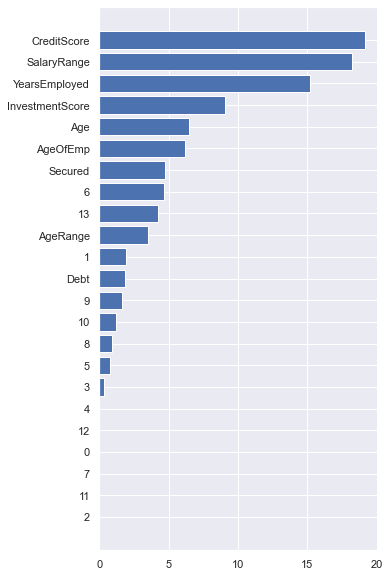

In [53]:
fig, ax = plt.subplots(figsize =(5,10))

columns = list(model.feature_names_)
importance = list((model.get_feature_importance()))

s = pd.Series(importance,columns)
s.sort_values(ascending=True, inplace=True)

columns = s.index
importance = s.values

ax.barh(range(len(columns)),(importance))
ax.set_yticks(range(len(columns)))
ax.set_yticklabels(columns)

# Logarithmic scale of weights

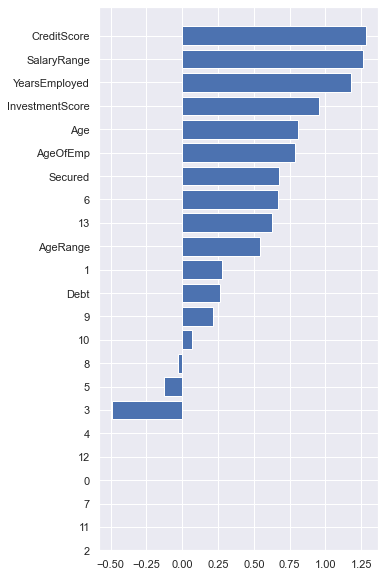

In [54]:
fig, ax = plt.subplots(figsize =(5,10))
ax.barh(range(len(columns)),np.log10(importance));
ax.set_yticks(range(len(columns)));
ax.set_yticklabels(columns);